# Example of Image Segmentation

First, import the necessary packages and set the plotting backend.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import histogram
import skimage.filters as filters
import skimage.measure as measure
%matplotlib inline

Load the image and plot it.

In [2]:
image = plt.imread(r'C:\Users\Tom Slater\OneDrive - Cardiff University\Talks\MMC 2023 Workshop/JEOL HAADF Image.tif')

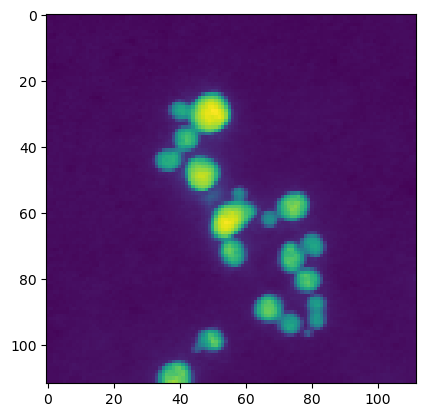

In [3]:
plt.imshow(image)

A histogram of the loaded image shows the pixel values of background and particles in this case. The aim is to find a threshold value that separates particles from background as accurately as possible.

In [5]:
hist, hist_centers = histogram(image)

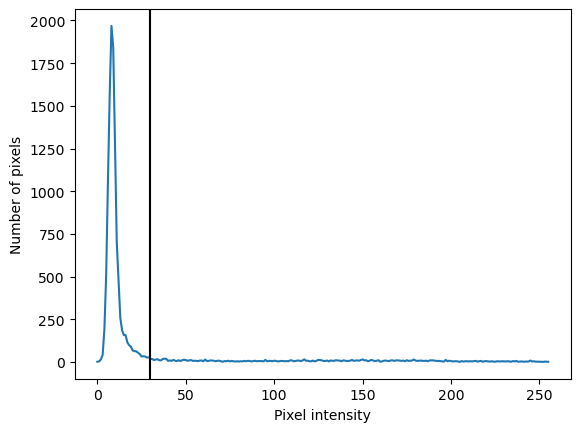

In [8]:
plt.figure()
plt.plot(hist)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.axvline(x = 30, color = 'k', label = 'axvline - full height')
plt.show()

A threshold value of 30 looks okay on the histogram, so let's try that.

In [9]:
markers = np.zeros_like(image)
markers[image > 30] = 1

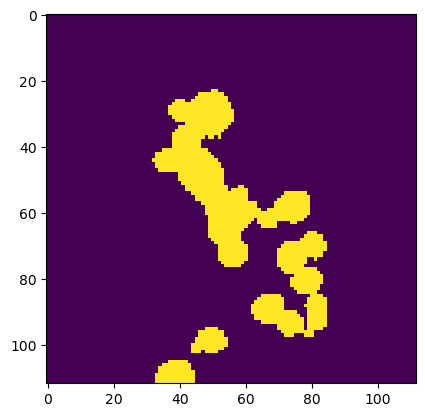

In [10]:
plt.figure()
plt.imshow(markers)

Thresholding with a value of 30 oversegmented the particles (included some background). Let's try a value of 50 instead.

In [11]:
markers = np.zeros_like(image)
markers[image > 50] = 1

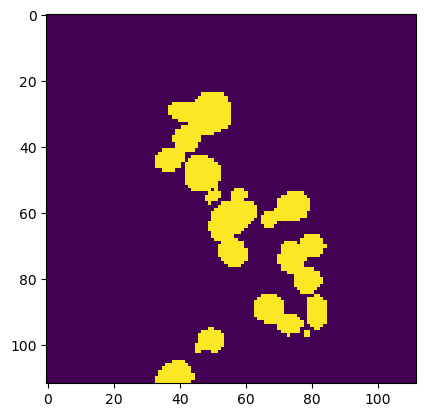

In [12]:
plt.figure()
plt.imshow(markers)

Manually searching for a threshold value is not the quickest or most repeatable method for segmentation. Instead, it's possible to use an automated method to find a threshold value. First, let's try an Otsu threshold.

In [14]:
thresh = filters.threshold_otsu(image)

In [15]:
print(thresh)

84


In [16]:
markers = np.zeros_like(image)
markers[image > thresh] = 1

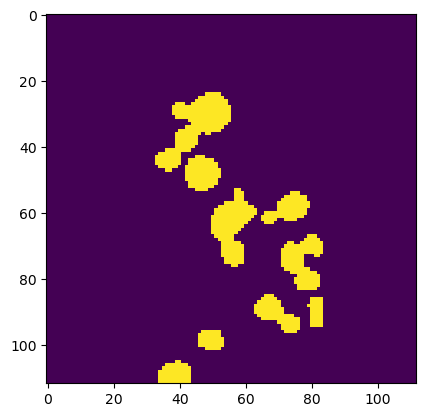

In [17]:
plt.figure()
plt.imshow(markers)

The Otsu theshold performs okay, although might not be the best in this particular case. There are many thresholding algorithms in scikit-image and it's possible to try all of them using the following function.

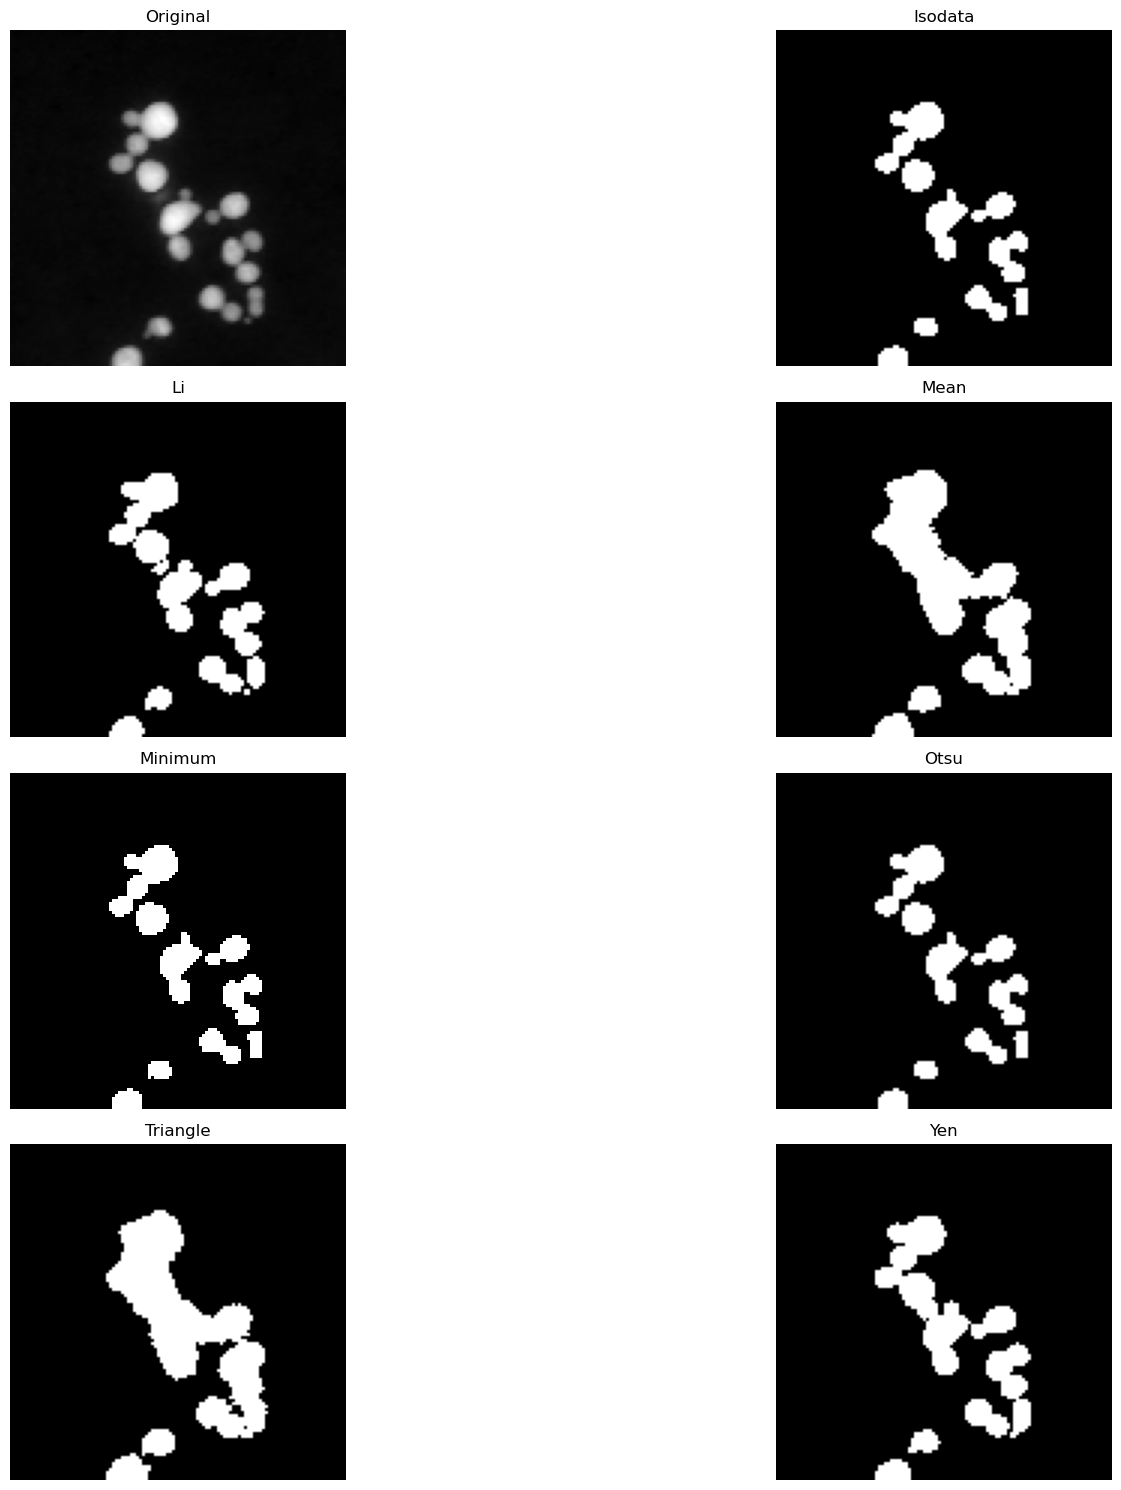

In [18]:
fig, ax = filters.try_all_threshold(image, figsize=(20, 15), verbose=False)

In this case, there are particles touching that we cannot separate via simple thresholding. It is possible to separate touching regions using a watershed algorithm, as shown below.

In [19]:
from skimage.filters import sobel
elevation_map = sobel(image)

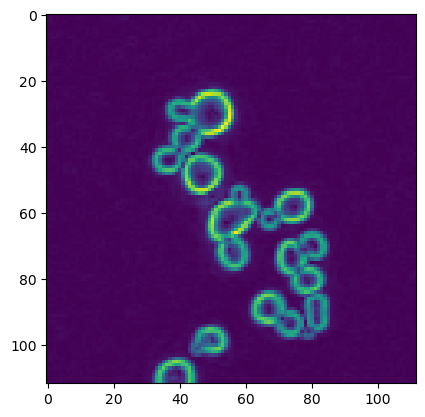

In [20]:
plt.imshow(elevation_map)

In [21]:
markers = np.zeros_like(image)
markers[image > 150] = 1
labels = measure.label(markers)
labels[labels>0] += 1
labels[image < 30] = 1

In [22]:
from skimage.segmentation import watershed
segmentation = watershed(elevation_map, labels)

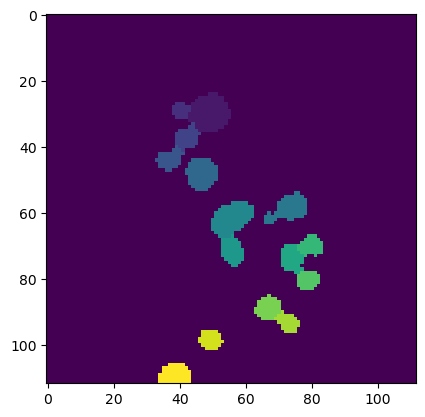

In [23]:
plt.imshow(segmentation)

In [24]:
print(labels.max())

16


In order to quantify segmented regions, scikit-image provides regionprops. The sort of information available in regionprops is shown below.

In [25]:
props = measure.regionprops(labels)

In [26]:
print(props)

[<skimage.measure._regionprops.RegionProperties object at 0x000001AB922DD250>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB922F0AF0>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB922F0B20>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB922F0820>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB922F0D60>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB922F0D90>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB91C0E1F0>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB8FCE2CA0>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB922B4040>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB922B4850>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB922B4820>, <skimage.measure._regionprops.RegionProperties object at 0x000001AB922AEFA0>, <skimage.measure._regionprops.RegionProperties object at 0x0000

In [27]:
print(props[1].area)

103


In [28]:
calibrated_area = props[1].area * (1.2)**2

In [29]:
print(calibrated_area)

148.32


Properties can be plotted in a table using pandas.

In [30]:
# measure properties
import pandas as pd
props = measure.regionprops_table(labels, image, properties=['area', 'centroid', 'eccentricity','axis_major_length','axis_minor_length'])
props_df = pd.DataFrame(props)

props_df.head(5)

,area,centroid-0,centroid-1,eccentricity,axis_major_length,axis_minor_length
0,11146,54.428584,55.224475,0.234119,136.013392,132.233292
1,103,29.970874,48.990291,0.409908,11.984663,10.931532
2,3,29.333333,40.666667,0.816497,2.309401,1.333333
3,19,37.578947,42.105263,0.632281,5.544698,4.295695
4,14,44.000000,36.928571,0.722844,5.197843,3.591767


In [31]:
image = plt.imread(r'C:\Users\Tom Slater\OneDrive - Cardiff University\Talks\MMC 2023 Workshop/HAADF _8MX _0008.tif')

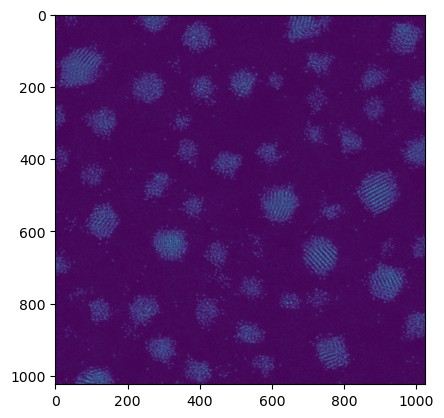

In [32]:
plt.imshow(image)

In [33]:
hist, hist_centers = histogram(image)

Text(0, 0.5, 'Number of pixels')

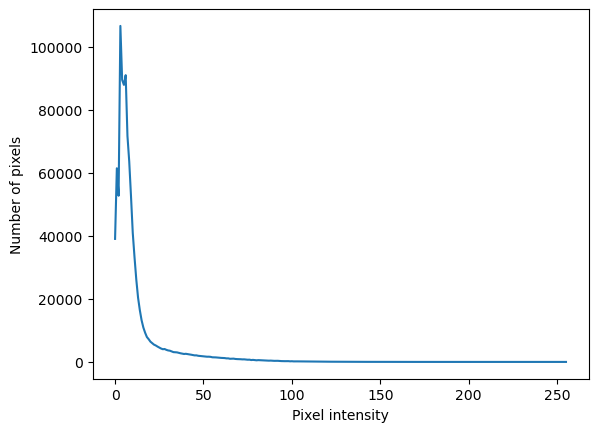

In [34]:
plt.figure()
plt.plot(hist)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')

In [35]:
thresh = filters.threshold_otsu(image)

In [36]:
print(thresh)

31


In [37]:
markers = np.zeros_like(image)
markers[image > thresh] = 1

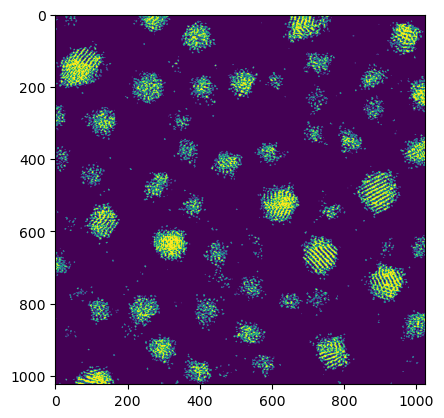

In [38]:
plt.imshow(markers)

In [39]:
im_gauss = filters.gaussian(image, sigma=7)

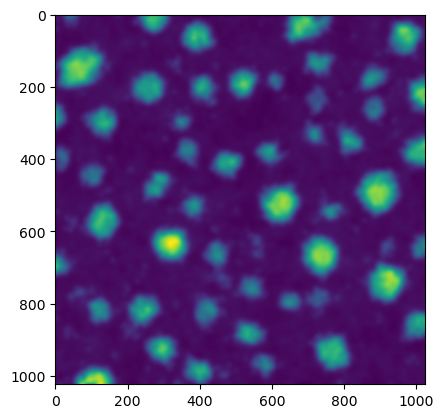

In [40]:
plt.imshow(im_gauss)

In [41]:
thresh = filters.threshold_otsu(im_gauss)

In [42]:
markers = np.zeros_like(image)
markers[im_gauss > thresh] = 1

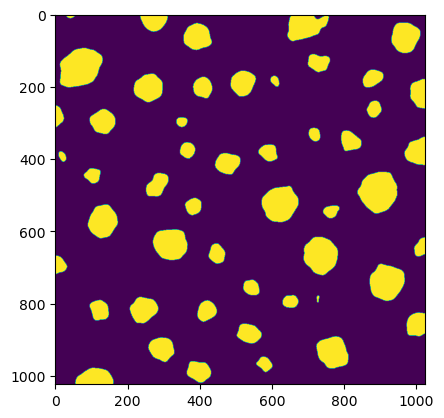

In [43]:
plt.imshow(markers)

For more detailed instructions on segmentation using python (Jupyter and NAPARI) and Fiji/ImageJ, visit the Learning Zone at 12.30 on Tuesday July 4th.